In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head(3)

,title,year
0,Somewhere in the NYC,2017
1,Des hommes et des dieux,2010
2,Beau Jest,2008


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head(3)

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [6]:
bs = cast[(cast.character == 'Superman') | (cast.character == 'Batman')] # .set_index('year').sort()

In [7]:
bs = bs.groupby(['year', 'character']).size()

In [8]:
bs = bs.unstack()

In [9]:
bs = bs.fillna(0)

In [10]:
bs.head()

character,Batman,Superman
year,,
1938,1,0
1940,1,0
1943,1,0
1948,0,1
1949,2,0


In [11]:
sup = bs[bs.Superman > bs.Batman]
print('Superman Years')
len(sup)

Superman Years


11

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [12]:
bs.head()

character,Batman,Superman
year,,
1938,1,0
1940,1,0
1943,1,0
1948,0,1
1949,2,0


In [13]:
bat = bs[bs.Batman > bs.Superman]
print('Batman Years')
len(bat)

Batman Years


24

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

In [14]:
aa = cast
aa = aa.groupby(['year', 'type']).size()

In [15]:
aa = aa.unstack()

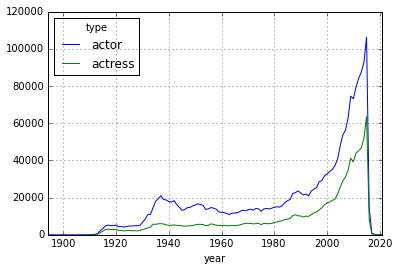

In [16]:
aa.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

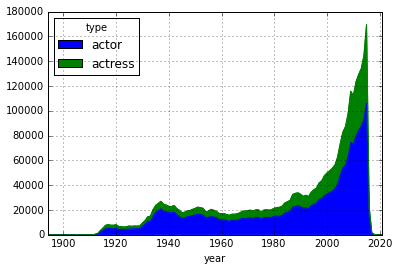

In [17]:
aa.plot(kind='area') #this doesn't seem right as actors should be the larger according to above

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

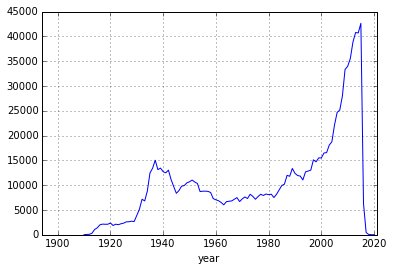

In [18]:
dif = aa.actor - aa.actress
dif.plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

In [28]:
# no

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

In [20]:
# no

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

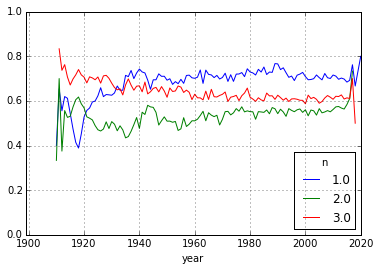

In [34]:
# copy Brandon's solution
c = cast
c = c[c.n <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack('type')
(c.actor / (c.actor + c.actress)).unstack('n').plot(ylim=[0,1]) #second unstack here